# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Christopher Guan
- Diana Issatayeva
- Angela Liu
- Ana Palma
- Melody Xue

# Group Members IDs

- A13513127
- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

## Education Dataset Cleaning

In [2]:
xls_Education = pd.ExcelFile("Education.xls")
df_ed = xls_Education.parse('Education')
display(df_ed)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,...,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,NaN,...,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,NaN,...,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,2.0,...,12.3,33.6,29.1,25.0
...,...,...,...,...,...,...,...,...,...
3280,72149,PR,Villalba Municipio,2.0,...,27.3,33.6,19.4,19.7
3281,72151,PR,Yabucoa Municipio,1.0,...,32.0,24.9,26.0,17.2
3282,72153,PR,Yauco Municipio,3.0,...,28.4,31.3,17.8,22.5


In [3]:
# Drop columns from previous years and keep most recent (2013-2017)
list(df_ed)

df_ed=df_ed.drop(['2003 Urban Influence Code','2013 Rural-urban Continuum Code','2003 Rural-urban Continuum Code','2013 Urban Influence Code','Less than a high school diploma, 1970',
 'High school diploma only, 1970',
 'Some college (1-3 years), 1970',
 'Four years of college or higher, 1970',
 'Percent of adults with less than a high school diploma, 1970',
 'Percent of adults with a high school diploma only, 1970',
 'Percent of adults completing some college (1-3 years), 1970',
 'Percent of adults completing four years of college or higher, 1970',
 'Less than a high school diploma, 1980',
 'High school diploma only, 1980',
 'Some college (1-3 years), 1980',
 'Four years of college or higher, 1980',
 'Percent of adults with less than a high school diploma, 1980',
 'Percent of adults with a high school diploma only, 1980',
 'Percent of adults completing some college (1-3 years), 1980',
 'Percent of adults completing four years of college or higher, 1980',
 'Less than a high school diploma, 1990',
 'High school diploma only, 1990',
 "Some college or associate's degree, 1990",
 "Bachelor's degree or higher, 1990",
 'Percent of adults with less than a high school diploma, 1990',
 'Percent of adults with a high school diploma only, 1990',
 "Percent of adults completing some college or associate's degree, 1990",
 "Percent of adults with a bachelor's degree or higher, 1990",
 'Less than a high school diploma, 2000',
 'High school diploma only, 2000',
 "Some college or associate's degree, 2000",
 "Bachelor's degree or higher, 2000",
 'Percent of adults with less than a high school diploma, 2000',
 'Percent of adults with a high school diploma only, 2000',
 "Percent of adults completing some college or associate's degree, 2000",
 "Percent of adults with a bachelor's degree or higher, 2000",],axis=1)

# Display the new dataframe and the column names
display(df_ed)
list(df_ed)

,FIPS Code,State,Area name,"Less than a high school diploma, 2013-17",...,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,2.74e+07,...,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,4.81e+05,...,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,4.52e+03,...,12.3,33.6,29.1,25.0
...,...,...,...,...,...,...,...,...,...
3280,72149,PR,Villalba Municipio,4.23e+03,...,27.3,33.6,19.4,19.7
3281,72151,PR,Yabucoa Municipio,7.72e+03,...,32.0,24.9,26.0,17.2
3282,72153,PR,Yauco Municipio,7.51e+03,...,28.4,31.3,17.8,22.5


['FIPS Code',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17"]

In [4]:
# Rename the FIPS column name to be able to merge later
df_ed=df_ed.rename(index=str, columns={"FIPS Code": "FIPS", })

## Food Environmental Atlas Dataset Cleaning

We extract only the data that we want to use in our analysis from the Atlas.

In [5]:
# Read in the data from Food Evironmental Atlas excel spreadsheet into pandas data frame
stores_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='STORES')
health_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='HEALTH')

In [6]:
# Separate the neccessary columns from the table
stores_var_list = ['GROC14', 'GROCPTH14', 'FIPS']
stores_df = stores_df[stores_var_list]

health_var_list = ['PCT_OBESE_ADULTS13', 'RECFAC14', 'RECFACPTH14', 'FIPS']
health_df = health_df[health_var_list]

In [7]:
stores_df

,GROC14,GROCPTH14,FIPS
0,4,0.07,1001
1,29,0.14,1003
2,5,0.19,1005
...,...,...,...
3140,2,0.10,56041
3141,2,0.24,56043
3142,4,0.56,56045


In [8]:
health_df

,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14,FIPS
0,34.1,5,0.09,1001
1,27.4,25,0.12,1003
2,44.4,0,0.00,1005
...,...,...,...,...
3140,27.9,2,0.10,56041
3141,27.7,1,0.12,56043
3142,29.2,0,0.00,56045


In [9]:
# Merging two Atlas dataframes on FIPS column
df_merged = stores_df.merge(health_df, left_on='FIPS', right_on='FIPS')

In [10]:
# Put FIPS column first 
# Get a list of columns
cols = list(df_merged)

# Move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('FIPS')))
df_merged = df_merged.loc[:, cols]
df_merged

,FIPS,GROC14,GROCPTH14,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14
0,1001,4,0.07,34.1,5,0.09
1,1003,29,0.14,27.4,25,0.12
2,1005,5,0.19,44.4,0,0.00
...,...,...,...,...,...,...
3140,56041,2,0.10,27.9,2,0.10
3141,56043,2,0.24,27.7,1,0.12
3142,56045,4,0.56,29.2,0,0.00


In [11]:
# Rename the column names to be more clear
df_merged = df_merged.rename(index=str, columns={"GROC14": "GROC_STORES_COUNT_2014", "GROCPTH14": "GROC_STORES_PER1000_2014", "PCT_OBESE_ADULTS13": "ADULT_OBESITY_RATE_2013", "RECFAC14": "RECREATION_FITNESS_FACIL_COUNT_2014", "RECFACPTH14": "RECREATION_FITNESS_FACIL_PER1000_2014" })

In [12]:
# Check for data types from the Atlas dataset
df_merged.dtypes

FIPS                                       int64
GROC_STORES_COUNT_2014                     int64
GROC_STORES_PER1000_2014                 float64
ADULT_OBESITY_RATE_2013                  float64
RECREATION_FITNESS_FACIL_COUNT_2014        int64
RECREATION_FITNESS_FACIL_PER1000_2014    float64
dtype: object

In [13]:
# Check for data types from the Education dataset
df_ed.dtypes

FIPS                                                                          int64
State                                                                        object
Area name                                                                    object
                                                                             ...   
Percent of adults with a high school diploma only, 2013-17                  float64
Percent of adults completing some college or associate's degree, 2013-17    float64
Percent of adults with a bachelor's degree or higher, 2013-17               float64
Length: 11, dtype: object

In [14]:
# Merging the Education and Food Environmental Atlas dataframes together on FIPS column
df = df_ed.merge(df_merged, left_on='FIPS', right_on='FIPS')
display(df)

,FIPS,State,Area name,"Less than a high school diploma, 2013-17",...,GROC_STORES_PER1000_2014,ADULT_OBESITY_RATE_2013,RECREATION_FITNESS_FACIL_COUNT_2014,RECREATION_FITNESS_FACIL_PER1000_2014
0,1001,AL,Autauga County,4521.0,...,0.07,34.1,5,0.09
1,1003,AL,Baldwin County,13997.0,...,0.14,27.4,25,0.12
2,1005,AL,Barbour County,4960.0,...,0.19,44.4,0,0.00
...,...,...,...,...,...,...,...,...,...
3138,56041,WY,Uinta County,1067.0,...,0.10,27.9,2,0.10
3139,56043,WY,Washakie County,654.0,...,0.24,27.7,1,0.12
3140,56045,WY,Weston County,410.0,...,0.56,29.2,0,0.00


In [15]:
# Display the columns in the final, merged dataframe
list(df)

['FIPS',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17",
 'GROC_STORES_COUNT_2014',
 'GROC_STORES_PER1000_2014',
 'ADULT_OBESITY_RATE_2013',
 'RECREATION_FITNESS_FACIL_COUNT_2014',
 'RECREATION_FITNESS_FACIL_PER1000_2014']

In [16]:
# # Testing to see what it would like with ALL counties
# df = df.sort_values(by='ADULT_OBESITY_RATE_2013')
# df = df.reset_index(drop=True)
# display(df)

# df.ADULT_OBESITY_RATE_2013.plot(figsize=(20,10))
# df.RECREATION_FITNESS_FACIL_COUNT_2014.plot(secondary_y=True)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

**Each point on the following scatter plots represents one of the counties in the United States**

## Obesity Rate vs. Recreation/Fitness Facilities Per 1000 People

Here, we plot the obesity rate against how many recreation/fitness facilities a county has per 1000 people to give us an idea about how facility access can affect obesity rates.

### Scatter Plot

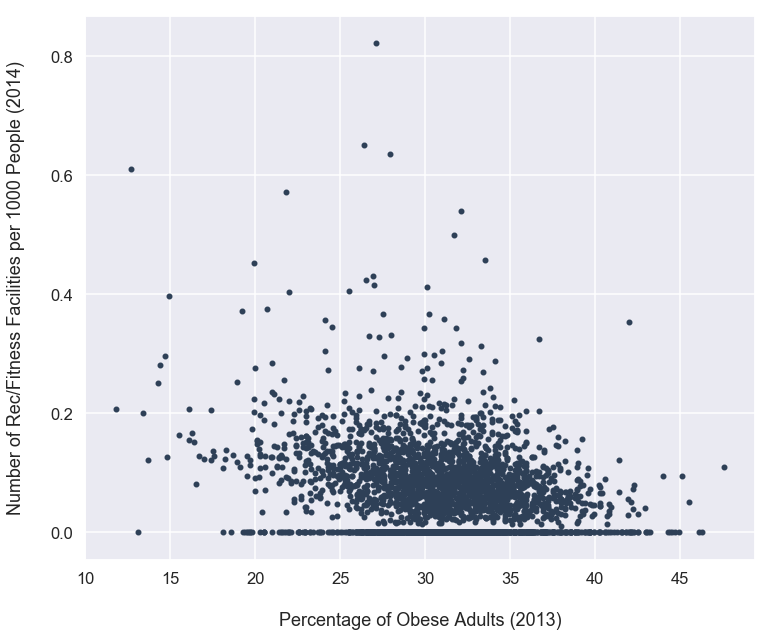

In [17]:
df.plot.scatter(x='ADULT_OBESITY_RATE_2013', y='RECREATION_FITNESS_FACIL_PER1000_2014', c='#2E4057', figsize=(12,10))
plt.xlabel('\nPercentage of Obese Adults (2013)')
plt.ylabel('Number of Rec/Fitness Facilities per 1000 People (2014)\n')
plt.show()

### OLS Regression

In [18]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.075
Model:                                 OLS   Adj. R-squared:                  0.074
Method:                      Least Squares   F-statistic:                     252.9
Date:                     Thu, 16 May 2019   Prob (F-statistic):           8.04e-55
Time:                             23:19:35   Log-Likelihood:                -9069.7
No. Observations:                     3140   AIC:                         1.814e+04
Df Residuals:                         3138   BIC:                         1.816e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

## Obesity Rate vs. Grocery Stores Per 1000 People

Here, we plot the obesity rate against how many groceries store a county has per 1000 people to give us an idea about how grocery store access can affect obesity rates.

### Scatter Plot

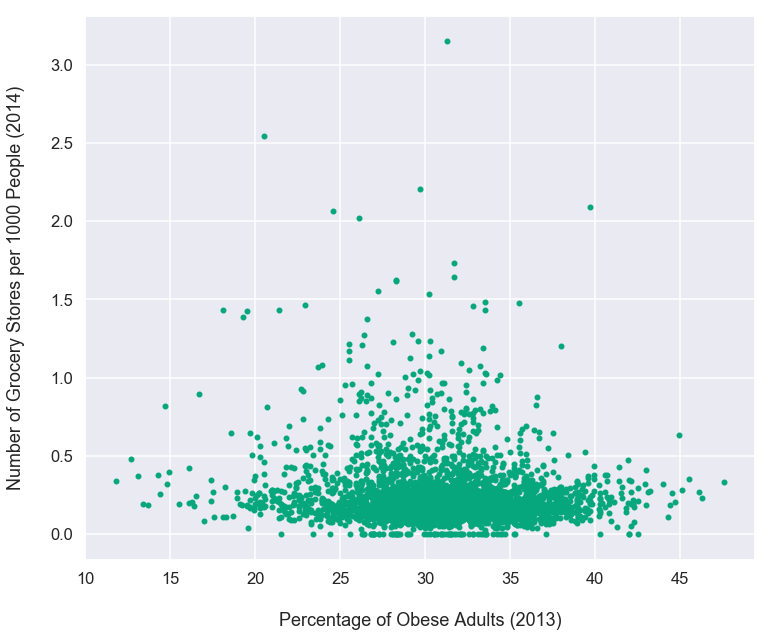

In [19]:
df.plot.scatter(x='ADULT_OBESITY_RATE_2013', y='GROC_STORES_PER1000_2014', c='#06A77D', figsize=(12,10))
plt.xlabel('\nPercentage of Obese Adults (2013)')
plt.ylabel('Number of Grocery Stores per 1000 People (2014)\n')
plt.show()

### OLS Regression

In [20]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ GROC_STORES_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                  0.012
Method:                      Least Squares   F-statistic:                     40.28
Date:                     Thu, 16 May 2019   Prob (F-statistic):           2.51e-10
Time:                             23:19:36   Log-Likelihood:                -9171.4
No. Observations:                     3140   AIC:                         1.835e+04
Df Residuals:                         3138   BIC:                         1.836e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

## Previous 2 Predictors Combined
Cannot combine with level of education (below) since it is a categorical variable

In [21]:
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014 + GROC_STORES_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.094
Model:                                 OLS   Adj. R-squared:                  0.094
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Thu, 16 May 2019   Prob (F-statistic):           2.71e-68
Time:                             23:19:36   Log-Likelihood:                -9035.7
No. Observations:                     3140   AIC:                         1.808e+04
Df Residuals:                         3137   BIC:                         1.810e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

## Obesity Rate vs. Percentage with 'Some College' and 'Bachelor's Degree or Higher'

Here, we plot the obesity rate against the percentage of adults in a county that have some college, an associate's, a bachelor's or higher. This is to give us an idea how a population's education level might affect obesity rates.

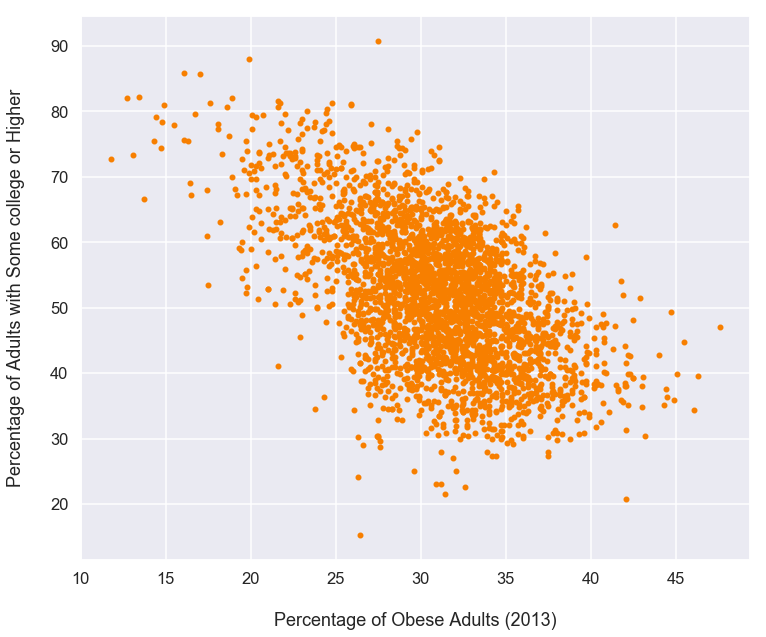

In [22]:
# Create and add a new column for % adults w/ some college or higher
df['College'] =  df[['Percent of adults completing some college or associate\'s degree, 2013-17', 'Percent of adults with a bachelor\'s degree or higher, 2013-17']].sum(axis=1)
df.plot.scatter(x='ADULT_OBESITY_RATE_2013', y='College', c='#F77F00', figsize=(12,10))
plt.xlabel('\nPercentage of Obese Adults (2013)')
plt.ylabel('Percentage of Adults with Some college or Higher\n')
plt.show()

## TODO Chi-Squared Test for Level of Education?

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

Potential discussion topic to mention: doesn't mention quality of grocery stores or rec/fitness facilities.

Are the grocery stores affordable? High-end facilitities like luxury gyms/classes or community/city ran rec centers? etc. etc.